# Importing The Necessary Libraries

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
# Read the ARFF file'

#data1, meta = arff.loadarff("C:\\Users\\jasmi\\Downloads\\Colon.arff") # Convert ARFF data to a pandas DataFrame
#data2, meta = arff.loadarff("C:\\Users\\jasmi\\Downloads\\MLL.arff") # Convert ARFF data to a pandas DataFrame

#colondf = pd.DataFrame(data1)
#mlldf = pd.DataFrame(data2)

#colondf.to_csv('Colon.csv', index=False)
#mlldf.to_csv('MLL.csv', index=False)


# Read the CSV file
#colondf = pd.DataFrame("C:\\Users\\jasmi\\Downloads\\Colon.csv")
#mlldf = pd.DataFrame("C:\\Users\\jasmi\\Downloads\\MLL.csv")

In [3]:
colondf=pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\colon.csv')

# COLON DATA :EDA-->Data types check,missing values,basic stats,value counts,Class Balance for Classifications ,Outliers,Visualization,distributions,relationships

In [5]:
colondf.head()

H55933_1   R39465_2   R39465_3   R85482_4   U14973_5   R02593_6  \
0  8589.4160  5468.2407  4263.4077  4064.9358  1997.8930  5282.3250   
1  9164.2540  6719.5293  4883.4487  3718.1590  2015.2214  5569.9070   
2  3825.7050  6970.3613  5369.9688  4705.6500  1166.5536  1572.1678   
3  6246.4487  7823.5340  5955.8350  3975.5642  2002.6132  2130.5430   
4  3230.3286  3694.4500  3400.7400  3463.5857  2181.4202  2922.7820   

    T51496_7   H80240_8   T65938_9  T55131_10  ...  R70790_1992  L11706_1993  \
0  2169.7200  2773.4211  7526.3860  4607.6763  ...     67.56125    259.91250   
1  3849.0588  2793.3875  7017.7340  4802.2524  ...     92.23875     96.27625   
2  1325.4025  1472.2587  3296.9512  2786.5820  ...     82.71500     31.10250   
3  1531.1425  1714.6312  3869.7850  4989.4070  ...     41.68375      5.92500   
4  2069.2463  2948.5750  3303.3710  3109.4130  ...     76.60375    161.35000   

   T90549_1994  D17390_1995  M33210_1996  H18490_1997  H40891_1998  \
0    138.89874     88.23250     39.66786     67.82875     75.67750   
1    150.59000     82.23750     85.03333    152.19500    186.56750   
2    193.92000     76.97250    224.62024     31.22500     42.65625   
3    183.00626     74.52875     67.71072     48.33875     42.52000   
4     61.70125     54.56375    223.35953     73.09875     57.59875   

   R77780_1999  T49647_2000      class  
0     83.52250     28.70125   b'Tumor'  
1     44.47250     16.77375  b'Normal'  
2     16.09250     15.15625   b'Tumor'  
3     49.98250     16.08500  b'Normal'  
4      7.48875     31.81250   b'Tumor'  

[5 rows x 2001 columns]

In [7]:
print(colondf.columns)

Index(['H55933_1', 'R39465_2', 'R39465_3', 'R85482_4', 'U14973_5', 'R02593_6',
       'T51496_7', 'H80240_8', 'T65938_9', 'T55131_10',
       ...
       'R70790_1992', 'L11706_1993', 'T90549_1994', 'D17390_1995',
       'M33210_1996', 'H18490_1997', 'H40891_1998', 'R77780_1999',
       'T49647_2000', 'class'],
      dtype='object', length=2001)


In [9]:
colondf.shape #Rows & Columns

(62, 2001)

In [13]:
colondf.dtypes

H55933_1       float64
R39465_2       float64
R39465_3       float64
R85482_4       float64
U14973_5       float64
                ...   
H18490_1997    float64
H40891_1998    float64
R77780_1999    float64
T49647_2000    float64
class           object
Length: 2001, dtype: object

In [15]:
print(colondf.info) #data types check

<bound method DataFrame.info of      H55933_1   R39465_2   R39465_3   R85482_4   U14973_5    R02593_6  \
0   8589.4160  5468.2407  4263.4077  4064.9358  1997.8930   5282.3250   
1   9164.2540  6719.5293  4883.4487  3718.1590  2015.2214   5569.9070   
2   3825.7050  6970.3613  5369.9688  4705.6500  1166.5536   1572.1678   
3   6246.4487  7823.5340  5955.8350  3975.5642  2002.6132   2130.5430   
4   3230.3286  3694.4500  3400.7400  3463.5857  2181.4202   2922.7820   
..        ...        ...        ...        ...        ...         ...   
57  4972.1660  4173.9180  3668.5337  1567.5554  1570.4406   3466.8108   
58  9112.3720  6824.4863  5982.8460  3147.0430  4847.3080  11222.6820   
59  6730.6250  3472.1250  2559.4624  2624.6892  1596.2179   4372.7890   
60  6234.6226  4005.3000  3093.6750  3183.0857  1795.3107   3940.8464   
61  7472.0100  3653.9340  2728.2163  3494.4805  2404.6655   5791.6070   

     T51496_7   H80240_8   T65938_9  T55131_10  ...  R70790_1992  L11706_1993  \
0   2169.7

In [17]:
print(colondf.duplicated().sum())

0


In [19]:
print(colondf.isna().sum().sum()) #Missing values

0


In [21]:
categorical_cols=colondf.select_dtypes(include='object')

In [23]:
##class balance would refer to wether the dataset contains equal or unequal numbers of samples for each class
#for example the value counts of the target variable in classification problem .If the dataset is imbalanced ,it may affect the perfirmance of the model
#Value Counts shows how many times each unique value appears in a column categorical column mostly for classification problems only or a single column only at each time

In [23]:
colondf['class'].value_counts()

class
b'Tumor'     40
b'Normal'    22
Name: count, dtype: int64

In [25]:
mlldf=pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\MLL.csv')

# MLL Data (EDA-->Data Types Check ,Missing Values,Basic Stats,Value Counts ,Class Balance -For classification, Correlations ,Outliers ,Visualization ,distributions ,relationships)

In [29]:
mlldf.head()

AFFX-MurIL2_at  AFFX-MurIL10_at  AFFX-MurIL4_at  AFFX-MurFAS_at  \
0          -163.0           -199.0            -7.0            69.0   
1          -310.0             19.0             0.0            48.0   
2          -216.0            126.0           -35.0            66.0   
3          -130.0            225.0            64.0           110.0   
4          -144.0             36.0            39.0           170.0   

   AFFX-hum_alu_at  AFFX-DapX-5_at  AFFX-DapX-M_at  AFFX-DapX-3_at  \
0          10327.0            58.0           217.0          -308.0   
1           1453.0            60.0           252.0             1.0   
2          12334.0            48.0           230.0           -73.0   
3          16464.0            48.0           254.0            24.0   
4           8130.0            87.0           584.0           -91.0   

   AFFX-LysX-5_at  AFFX-LysX-M_at  ...  101_at  102_at  103_at  104_at  \
0           110.0          -262.0  ...   236.0   241.0    29.0   378.0   
1           -42.0            11.0  ...  -134.0   219.0   406.0   494.0   
2            12.0          -161.0  ...  -158.0   136.0   128.0   588.0   
3           -64.0             2.0  ...   350.0   128.0    82.0   212.0   
4            19.0          -432.0  ...   221.0   -37.0   235.0   425.0   

   105_at  106_at  107_at  108_g_at  109_at   class  
0   -25.0   167.0  1380.0    -509.0   716.0  b'ALL'  
1   -32.0  1359.0   -84.0    -348.0  1646.0  b'ALL'  
2   -86.0   537.0  1042.0    -941.0   853.0  b'ALL'  
3    43.0    94.0    67.0    -350.0   458.0  b'ALL'  
4   -83.0  2314.0   225.0    -957.0   760.0  b'MLL'  

[5 rows x 12583 columns]

In [31]:
print(mlldf.columns)

Index(['AFFX-MurIL2_at', 'AFFX-MurIL10_at', 'AFFX-MurIL4_at', 'AFFX-MurFAS_at',
       'AFFX-hum_alu_at', 'AFFX-DapX-5_at', 'AFFX-DapX-M_at', 'AFFX-DapX-3_at',
       'AFFX-LysX-5_at', 'AFFX-LysX-M_at',
       ...
       '101_at', '102_at', '103_at', '104_at', '105_at', '106_at', '107_at',
       '108_g_at', '109_at', 'class'],
      dtype='object', length=12583)


In [33]:
print(mlldf.shape) #Rows and Columns

(72, 12583)


In [35]:
print(mlldf.info()) #Data Types Check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 12583 entries, AFFX-MurIL2_at to class
dtypes: float64(12582), object(1)
memory usage: 6.9+ MB
None


In [37]:
print(mlldf.duplicated().sum())

0


In [40]:
print(mlldf.describe()) #Basic Stats

       AFFX-MurIL2_at  AFFX-MurIL10_at  AFFX-MurIL4_at  AFFX-MurFAS_at  \
count       72.000000        72.000000       72.000000       72.000000   
mean      -184.386111        53.997222       23.897222      204.626389   
std        154.677407       115.986621       52.522403      156.131660   
min       -522.000000      -232.000000     -154.000000      -14.000000   
25%       -281.250000        -0.250000       -5.000000       74.250000   
50%       -183.000000        48.000000       21.500000      170.500000   
75%        -74.750000       116.000000       53.500000      302.500000   
max        218.000000       401.000000      146.000000      681.000000   

       AFFX-hum_alu_at  AFFX-DapX-5_at  AFFX-DapX-M_at  AFFX-DapX-3_at  \
count        72.000000       72.000000       72.000000       72.000000   
mean      16115.662500       86.625000      350.906944     -110.855556   
std        7117.225191       70.707578      160.439593      115.395575   
min        1453.000000      -61.00000

In [41]:
print(mlldf.isna().sum().sum()) #Missing Values

0


In [46]:
categorical_cols = mlldf.select_dtypes(include='object')

##class balance would refer to whether the dataset contains equal or unequal numbers of samples for each class. for Example the value counts of the target variable in a classification problem. If the dataset is imbalanced, it may affect the performance of the model.
# Value Counts  shows how many times each unique value appears in a column categorical column mostly for classification problems only or a single column only at each time

mlldf['class'].value_counts()

class
b'AML'    28
b'ALL'    24
b'MLL'    20
Name: count, dtype: int64

# Clustering Genes

## Heatmap Before Applying PCA

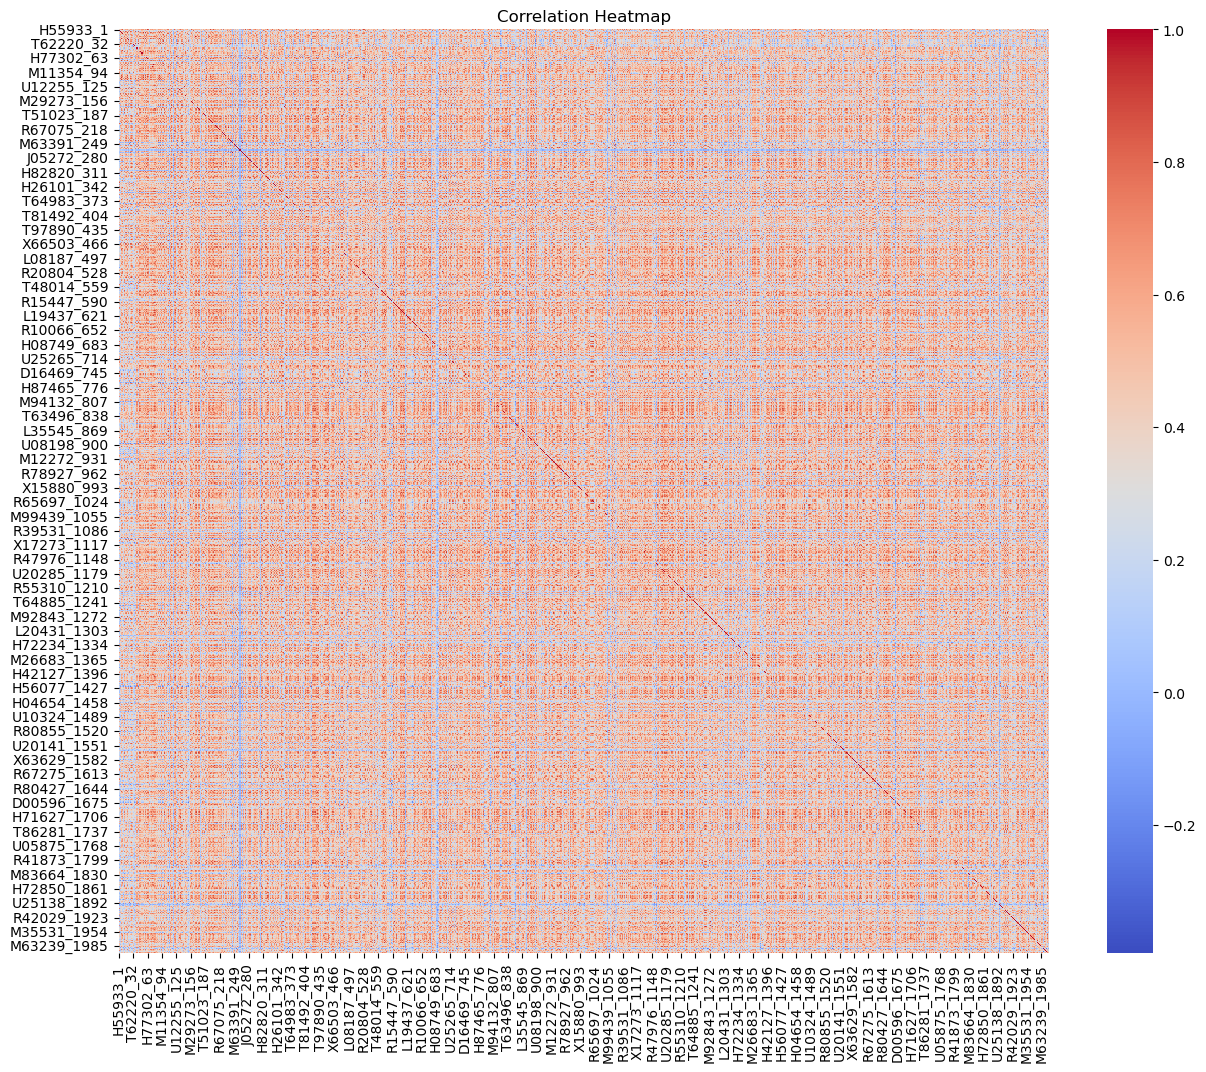

In [48]:
genes_only=colondf.drop(columns=['class'],errors='ignore') #Dropping the class column from data to show relationships among genes
correlation_matrix=genes_only.corr() #Calculating the correlation matrix among data
#Calculating the correlation matrix among the columns
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## choosing the optimal number of principal components without applying PCA

In [50]:
#Choosing the Best number of components
x_pca=colondf.drop(columns=['class'])#Dropping the Column of class to make data cosist of genes only
scaler=StandardScaler() #initializing the standard scaler of the data
x_scaled=scaler.fit_transform(x_pca) #fitting the scaler on data and transforming it
pca=PCA() #initializing pca principal component model
pca.fit(x_scaled) #fitting the model on scaled data
explained_variance=pca.explained_variance_ratio_ #getting the explained variance ratio for each component
commulative_variance=explained_variance.cumsum() #computing the commulative variance

Text(0.5, 1.0, 'Variance Explained By PCA')

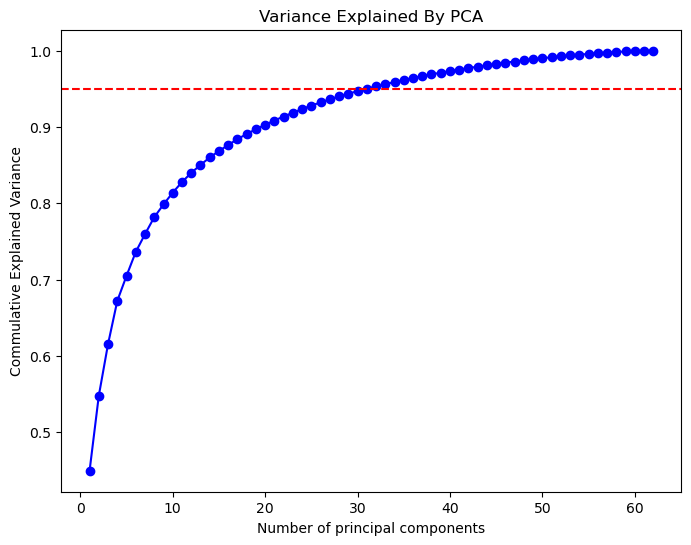

In [52]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(explained_variance)+1),commulative_variance,marker='o',color='b')
plt.axhline(y=0.95,color='r',linestyle='--')
plt.xlabel('Number of principal components')
plt.ylabel('Commulative Explained Variance')
plt.title('Variance Explained By PCA')
#The optimal number of components is the first intercept between the blue and red lines

In [55]:
# The optimal number of principal components is observed by the first intersection between the red line(Commulative Explained Variance) and line in 95%
# The optimal number of principal components=30

In [54]:
pca=PCA(n_components=30) #initializing pca with 30 components
pca.fit(x_scaled) #fitting the model on scaled data
x_pca=pca.fit_transform(x_scaled) #transforming the data
pca_columns=[f'PC{i+1}'for i in range(30)]
x_pca=pd.DataFrame(x_pca,columns=pca_columns) #converting the transformed data to a dataframe

## Heatmap after PCA

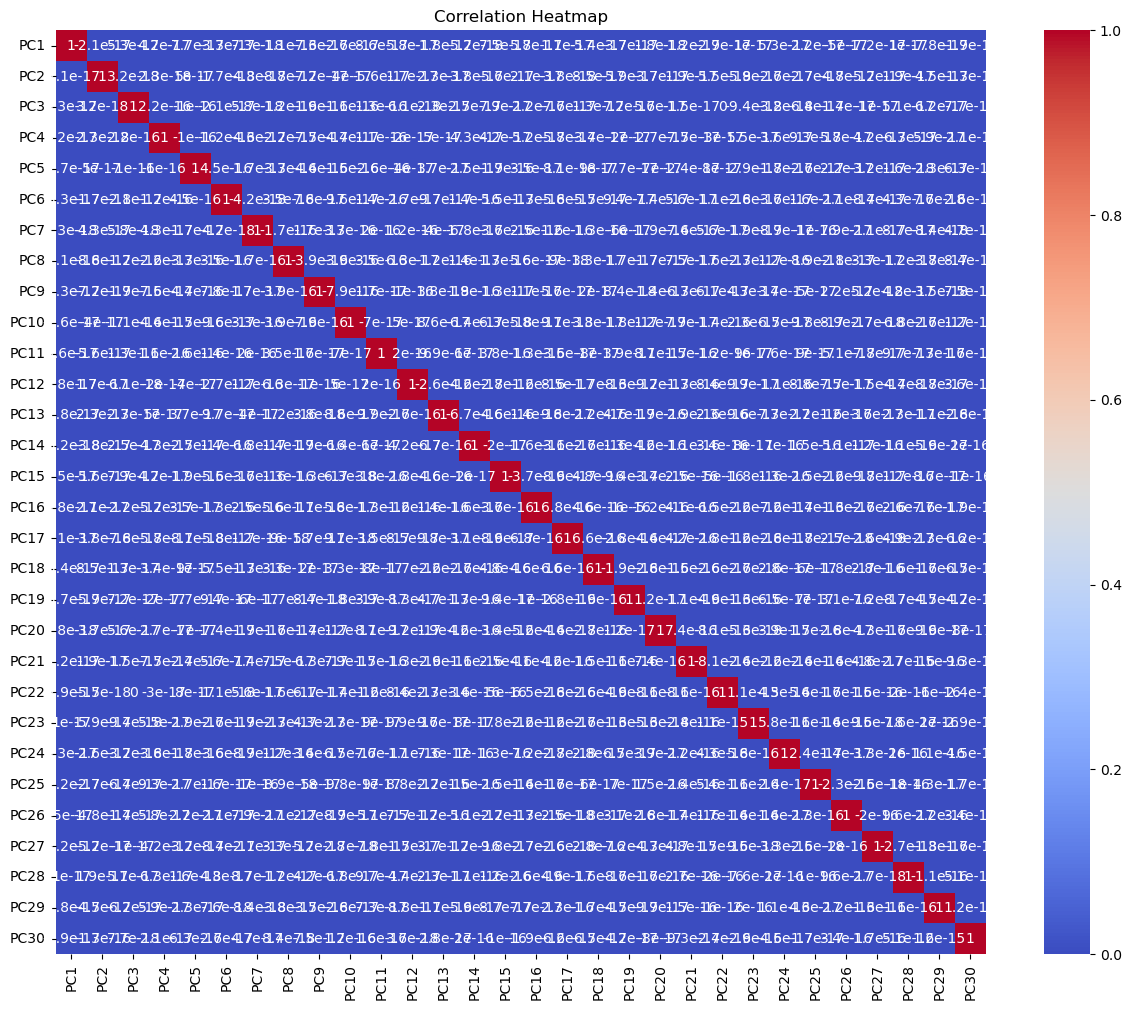

In [56]:
correlation_matrix=x_pca.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## PCA Visualization in 2D

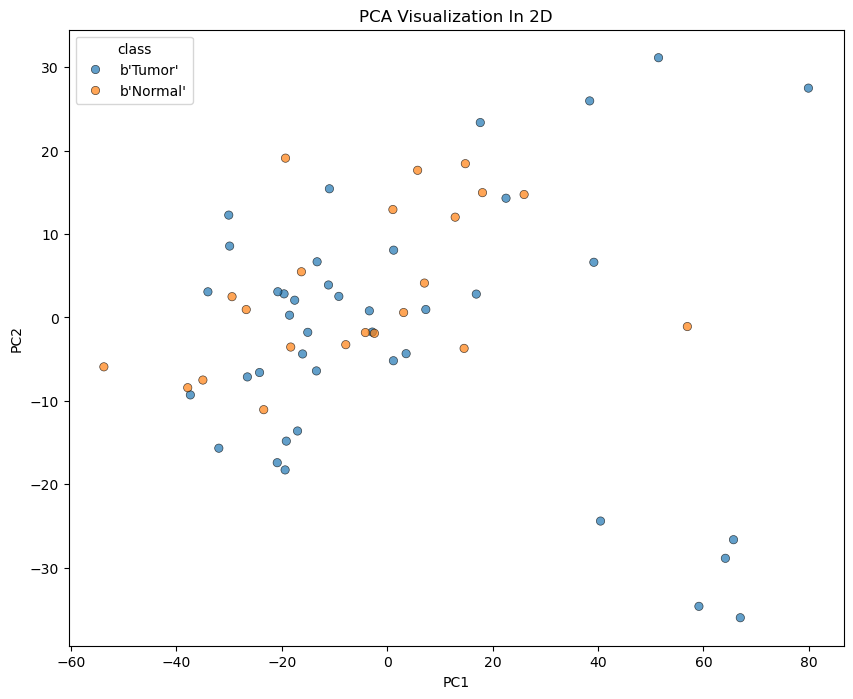

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_pca['PC1'],y=x_pca['PC2'],hue=colondf['class'],edgecolor='k',alpha=0.7)
plt.title('PCA Visualization In 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## PCA Visualization in 3D

In [60]:
colondf['class']=colondf['class'].apply(lambda x:x.decode('utf-8') if isinstance(x, bytes) else x)#decoding class from bytes to utf-8
colondf['class']=colondf['class'].astype(str).str.replace("b'","").str.replace("'","")#cleaning class
class_codes=colondf['class'].astype('category').cat.codes #converting class to categorical values

Text(0.5, 0.92, 'PCA Visualization In 3D')

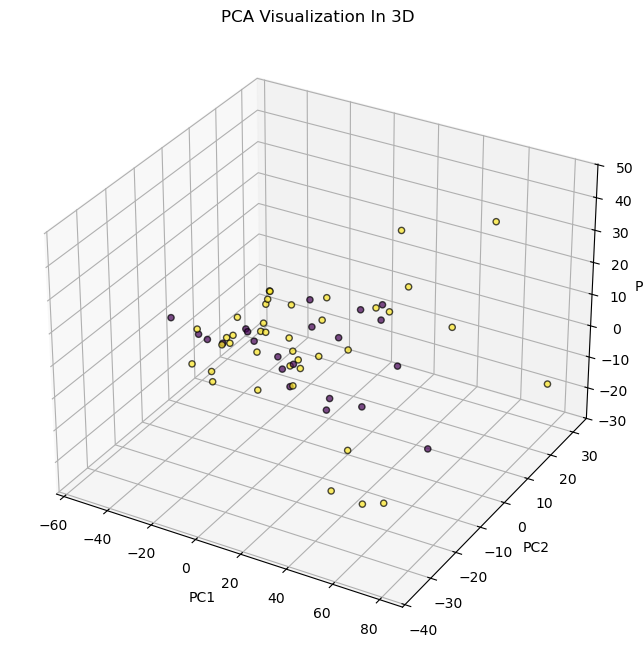

In [62]:
fig=plt.figure(figsize=(10,8))  #creating new figure for the 3d plot
ax=fig.add_subplot(111,projection='3d') #adding the new figure to '111' which indicates 1 row ,1 column & 1 plot
ax.scatter(x_pca['PC1'],x_pca['PC2'],x_pca['PC3'],c=class_codes,cmap='viridis',edgecolor='k',alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA Visualization In 3D')
#plotting the 3d scatter plot
#x,y,z correspond too pc1,pc2,pc3

# Applying Kmeans Clustering after PCA application

C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on 

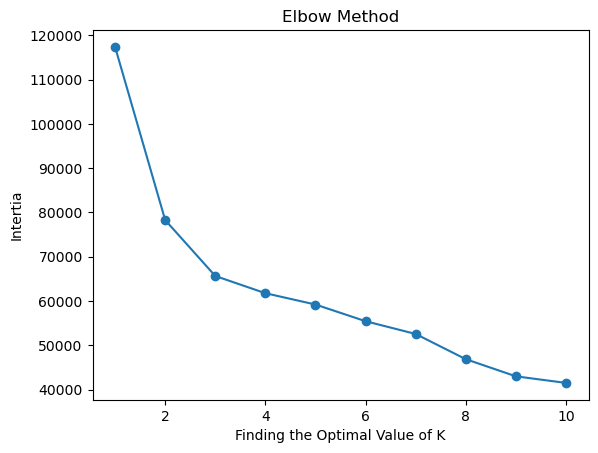

In [64]:
#Choosing the best k using elbow method
intertia=[]  #create empty list to store the interia values for different values of k
for k in range(1,11):  #looping in different values of k from 1 to 11 to find the optimal number of clusters
    kmeans=KMeans(n_clusters=k,random_state=42) #initialization
    kmeans.fit(x_pca)   #fitting
    intertia.append(kmeans.inertia_)
plt.plot(range(1,11),intertia,marker='o')
plt.xlabel('Finding the Optimal Value of K')
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()
#We find the optimal number of clusters in the point on which sudden change occur

In [77]:
#From the Results of Elbow Method we find that the sudden change occurs when k=7

In [66]:
pca_2D=PCA(n_components=2)  #Applying pca again to reduce data to 2 commponents to make it easier in visualization
x_pca_2d=pd.DataFrame(pca_2D.fit_transform(x_pca),columns=['PC1','PC2'])   #Reducing dimensions to pc1,pc2

In [68]:
kmeans=KMeans(n_clusters=7,random_state=42)
kmeans_labels=kmeans.fit_predict(x_pca_2d)

C:\Users\CYBER-TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# kmeans visualization

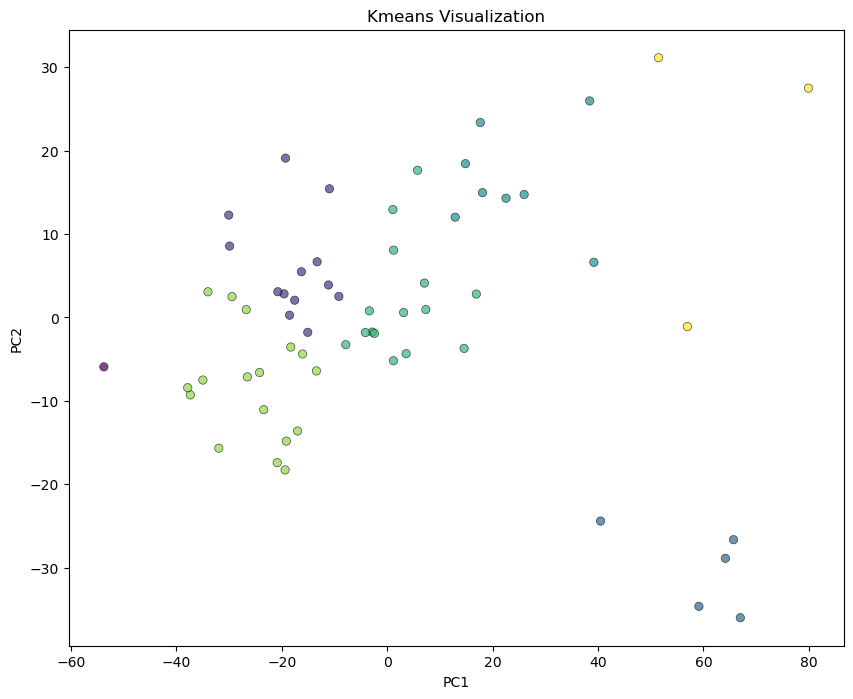

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_pca_2d['PC1'],y=x_pca_2d['PC2'],c=kmeans_labels,cmap='viridis',edgecolor='k',alpha=0.7)
plt.title('Kmeans Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Hierarchical Clustering (HC)

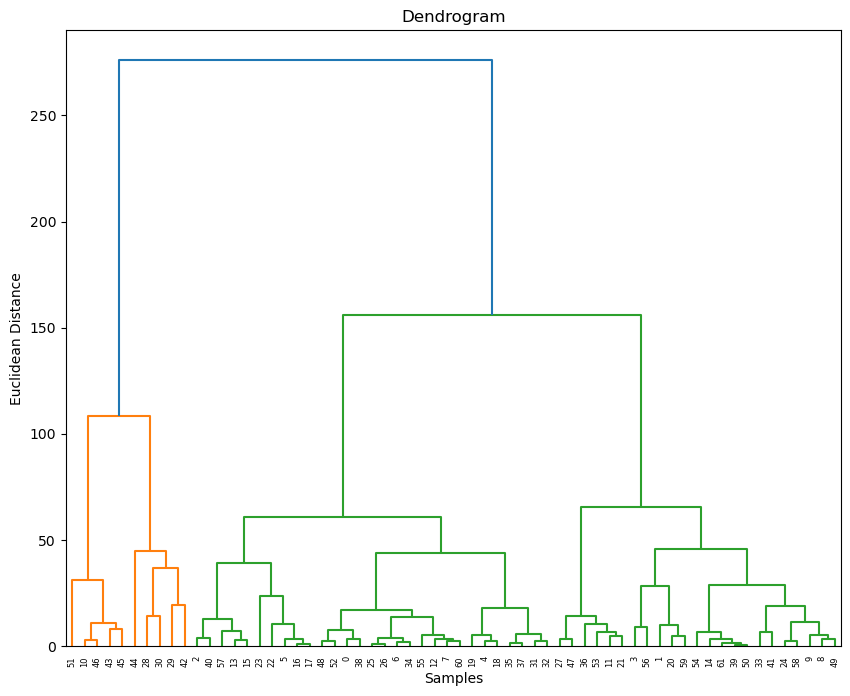

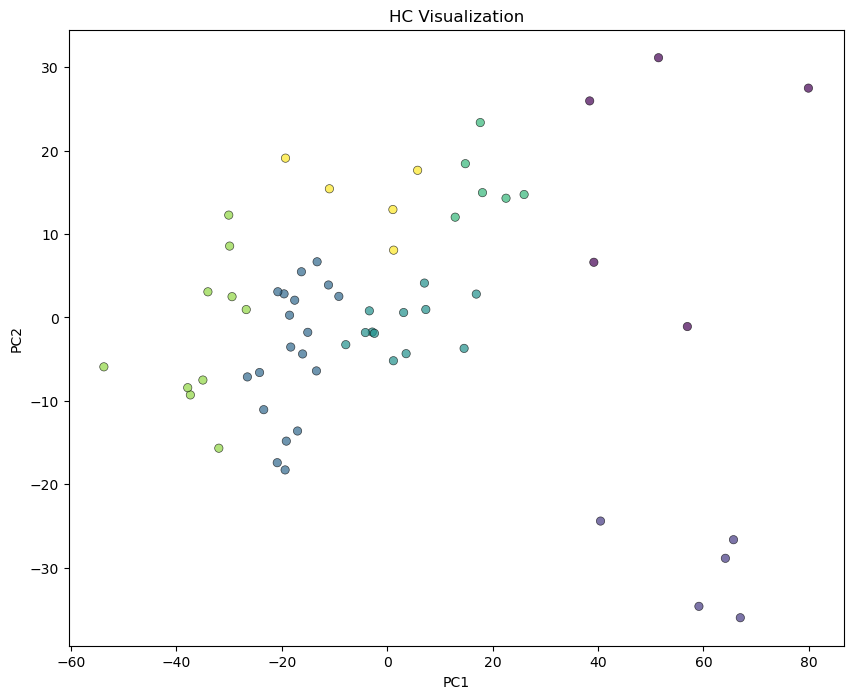

In [74]:
#Applying hierarchical clustering on the PCA reduced data using ward's method
#Linkage function computes the linkage matrix to represent hierarchical clustering
linkage_matrix=linkage(x_pca_2d,method='ward')
plt.figure(figsize=(10,8))   #plotting dendrogram to visualize the hierarchical structure
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()
#Applying AgglomerativeClustering using 7 clusters with wards method
HC=AgglomerativeClustering(n_clusters=7,linkage='ward')
HC_labels=HC.fit_predict(x_pca_2d)   #predicting the class labels based on the data
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_pca_2d['PC1'],y=x_pca_2d['PC2'],c=HC_labels,cmap='viridis',edgecolor='k',alpha=0.7)
plt.title('HC Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [94]:
#Heatmap after reducing the dimensions to 2 components for visualization

# DBSCAN

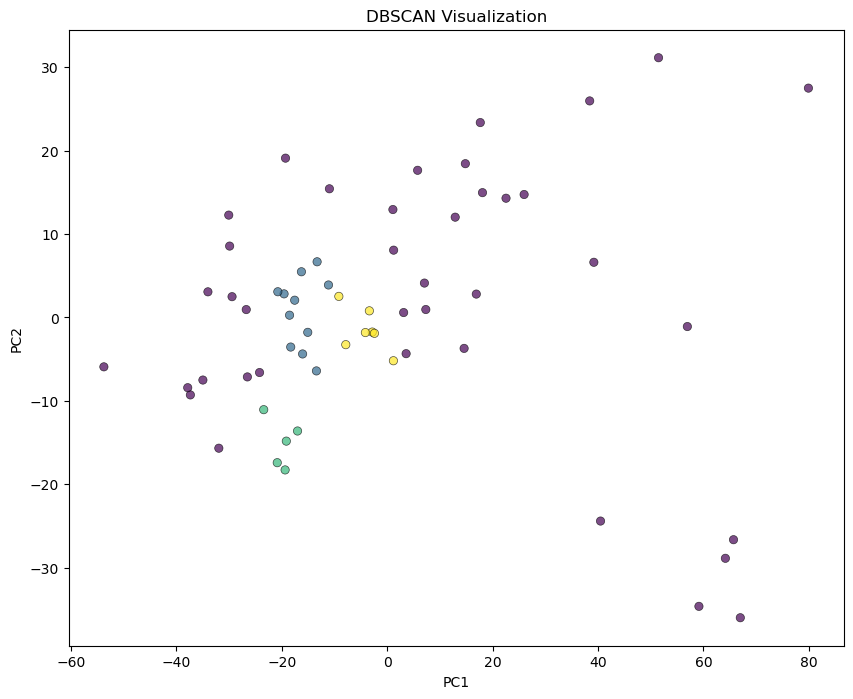

In [76]:
#Applying DBSCAN Algorithm using eps=6 and min_samples=5
dbscan=DBSCAN(eps=6,min_samples=5)
dbscan_labels=dbscan.fit_predict(x_pca_2d)    #Contains the cluster labels returned by the algorithm
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_pca_2d['PC1'],y=x_pca_2d['PC2'],c=dbscan_labels,cmap='viridis',edgecolor='k',alpha=0.7)
plt.title('DBSCAN Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA Reduction

In [78]:
from sklearn.decomposition import PCA
pca =PCA(n_components=0.95) # keep 95% variance
samples_pca=pca.fit_transform(x_pca)
print(samples_pca)

[[-1.32948368e+01  6.67576510e+00  6.32683295e+00 ... -1.18111065e+00
  -3.26682093e+00  1.50932284e-01]
 [ 5.77560423e+00  1.76475043e+01  1.04457130e+00 ...  5.58992497e+00
  -2.46921393e+00 -7.12149554e-01]
 [-3.00614558e+01  1.22747001e+01  3.66140668e+00 ... -7.00427800e+00
   6.48411126e-01  2.92198928e+00]
 ...
 [ 1.08650157e+00  1.29423281e+01 -5.60493950e+00 ...  3.58375553e+00
   3.84413776e+00 -2.04069313e+00]
 [-1.60491827e+01 -4.38045253e+00 -1.52737757e+00 ... -2.04637178e+00
   3.54289815e+00  1.66711048e+00]
 [-4.13265957e+00 -1.81440999e+00 -1.19129907e+01 ... -2.45037654e-02
  -1.72795759e+00 -1.18689170e+00]]


# Hierarchical Clustering

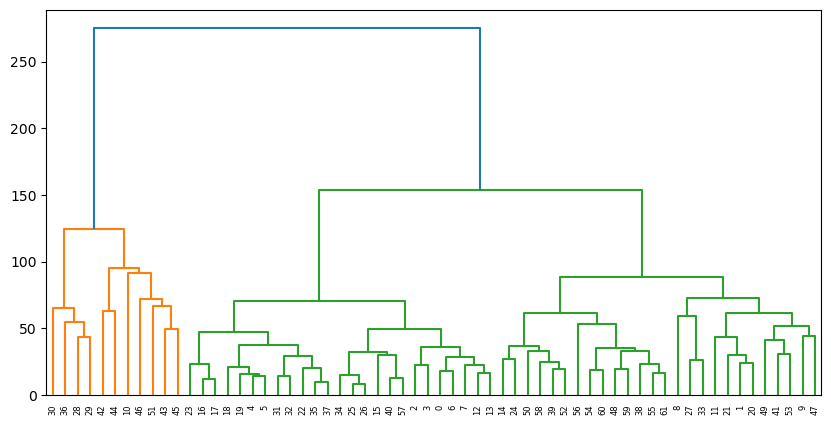

In [80]:
from scipy.cluster.hierarchy  import linkage, dendrogram, fcluster
z = linkage(samples_pca,method='ward')
plt.figure(figsize=(10,5))
dendrogram(z)
plt.show()

# Assign Clusters

In [82]:
clusters = fcluster(z, t=3, criterion='maxclust') #3 clusters
clusters

array([2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 1, 1, 1, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 3, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3], dtype=int32)

# Visualization

<Figure size 2000x1200 with 0 Axes>

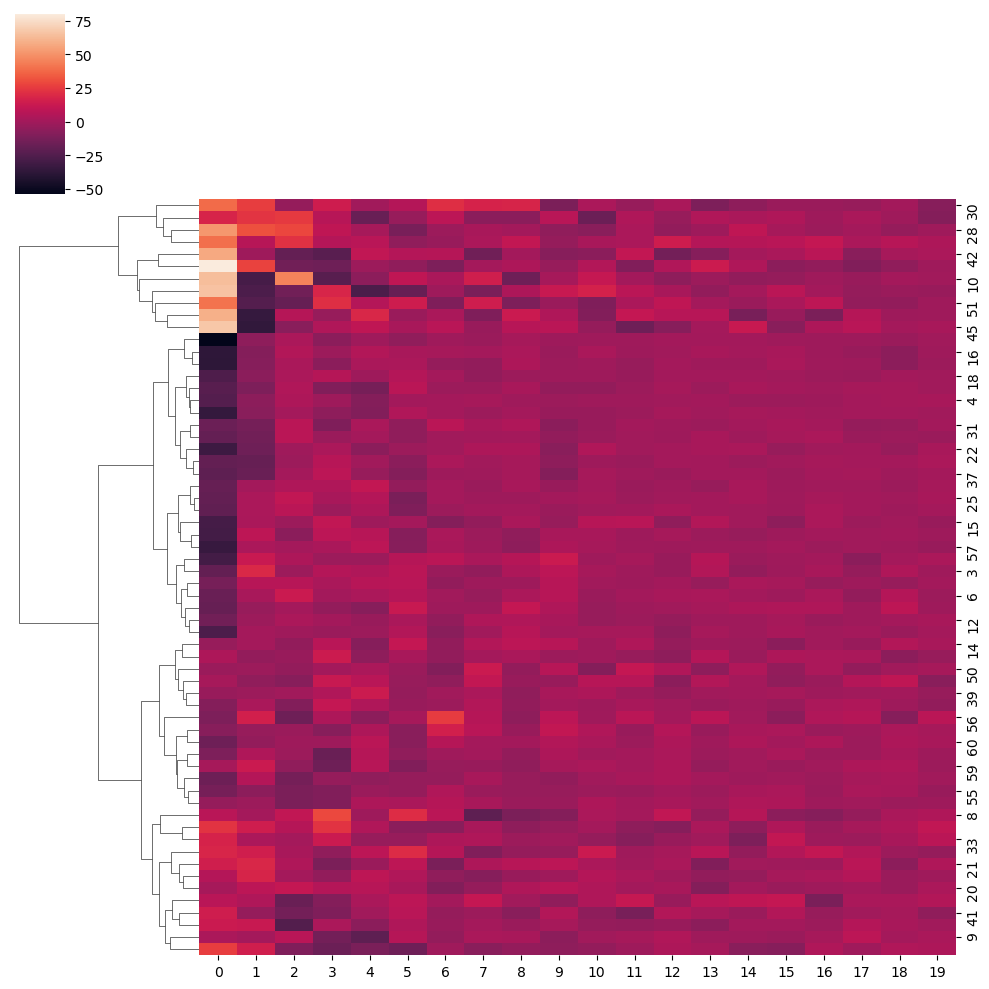

In [84]:
plt.figure(figsize=(20,12))
sns.clustermap(samples_pca, row_linkage=z, col_cluster=False)  # Heatmap

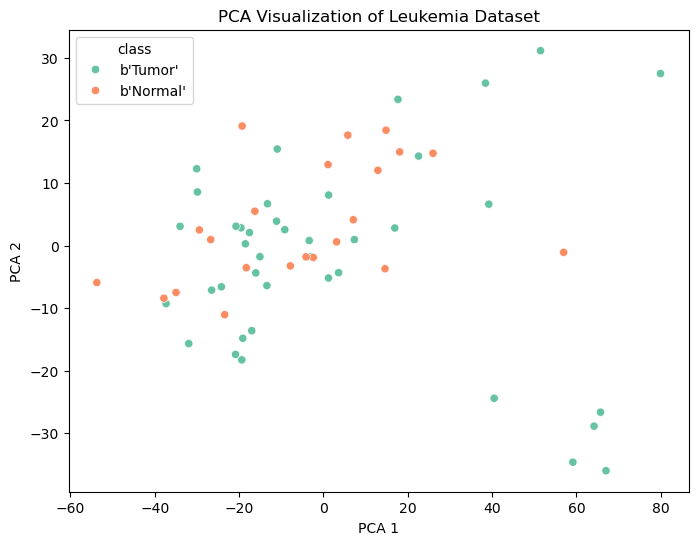

=== KNN ===
              precision    recall  f1-score   support

   b'Normal'       1.00      0.56      0.71         9
    b'Tumor'       0.71      1.00      0.83        10

    accuracy                           0.79        19
   macro avg       0.86      0.78      0.77        19
weighted avg       0.85      0.79      0.78        19



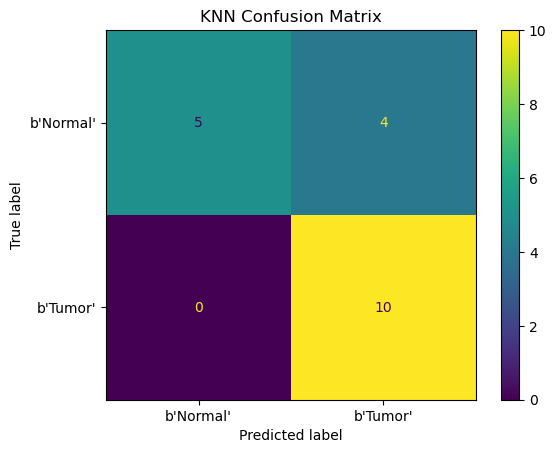

=== SVM ===
              precision    recall  f1-score   support

   b'Normal'       1.00      0.78      0.88         9
    b'Tumor'       0.83      1.00      0.91        10

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19



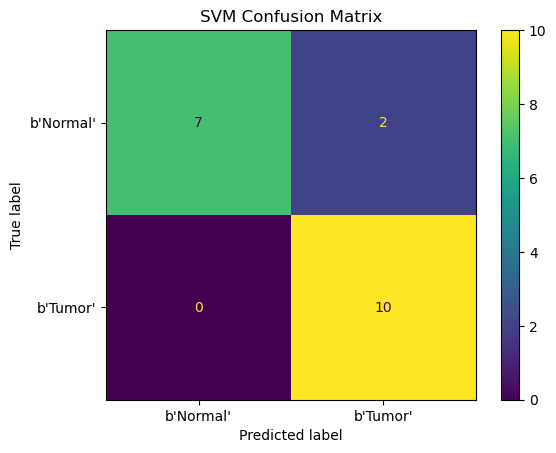

=== Neural Network ===
              precision    recall  f1-score   support

   b'Normal'       1.00      0.89      0.94         9
    b'Tumor'       0.91      1.00      0.95        10

    accuracy                           0.95        19
   macro avg       0.95      0.94      0.95        19
weighted avg       0.95      0.95      0.95        19



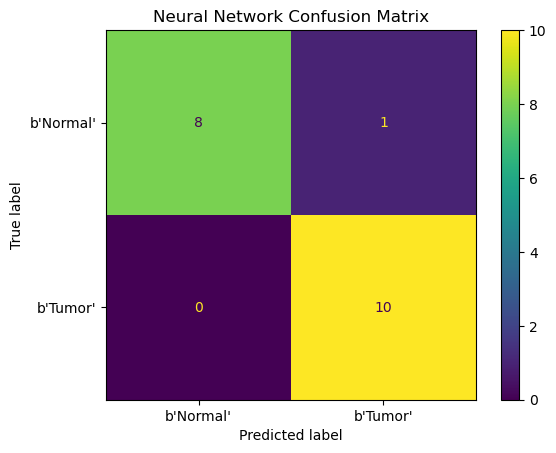

In [86]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

# 1. Load dataset
df=pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\colon.csv')


# 2. Split features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Feature Selection - Filter (ANOVA)
anova_selector = SelectKBest(score_func=f_classif, k=50)
X_anova = anova_selector.fit_transform(X_scaled, y)

# 5. Feature Selection - Wrapper (RFE with SVM)
svm_linear = SVC(kernel="linear")
rfe_selector = RFE(estimator=svm_linear, n_features_to_select=50)
X_rfe = rfe_selector.fit_transform(X_scaled, y)

# 6. Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca_vis = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_vis[:,0], y=X_pca_vis[:,1], hue=y, palette='Set2')
plt.title("PCA Visualization of Leukemia Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# 8. KNN Classification
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("KNN Confusion Matrix")
plt.show()

# 9. SVM Classification
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM Confusion Matrix")
plt.show()

# 10. Neural Network Classification
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("=== Neural Network ===")
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("Neural Network Confusion Matrix")
plt.show()

In [88]:
from sklearn.ensemble import VotingClassifier

ensem = VotingClassifier(estimators=[('KNN' , knn) , ('SVM' , svm) ,
                                     ('MLP' , mlp)] , voting = 'hard')

ensem.fit(X_train,y_train)
y_pred_ensem = ensem.predict(X_test)

print("=== Ensemble Model FOR COLON ===")
print('Accuracy of model : ' , accuracy_score(y_test,y_pred_ensem) , '\n')
print(classification_report(y_test,y_pred_ensem))

=== Ensemble Model FOR COLON ===
Accuracy of model :  0.8947368421052632 

              precision    recall  f1-score   support

   b'Normal'       1.00      0.78      0.88         9
    b'Tumor'       0.83      1.00      0.91        10

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19



In [90]:
confusion_matrix(y_test,y_pred_ensem)

array([[ 7,  2],
       [ 0, 10]], dtype=int64)

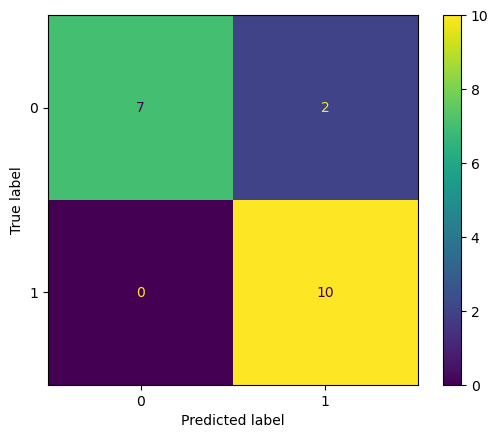

In [92]:
conf_ensem = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_ensem))
conf_ensem.plot()
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

results = {
    "KNN": metrics(y_test, y_pred_knn),
    "SVM": metrics(y_test, y_pred_svm),
    "MLP": metrics(y_test, y_pred_mlp),
    "Ensemble": metrics(y_test, y_pred_ensem)
}


results = pd.DataFrame(results)
print('Compare performance \n')
print(results)

Compare performance 

                KNN       SVM       MLP  Ensemble
Accuracy   0.789474  0.894737  0.947368  0.894737
Precision  0.849624  0.912281  0.952153  0.912281
Recall     0.789474  0.894737  0.947368  0.894737
F1-Score   0.776942  0.892943  0.947074  0.892943


In [96]:
print('best model is mpl')

best model is mpl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

# 1. Load dataset
df=pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\MLL.csv')

# 2. Split features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Feature Selection - Filter (ANOVA)
anova_selector = SelectKBest(score_func=f_classif, k=50)
X_anova = anova_selector.fit_transform(X_scaled, y)

# 5. Feature Selection - Wrapper (RFE with SVM)
svm_linear = SVC(kernel="linear")
rfe_selector = RFE(estimator=svm_linear, n_features_to_select=50)
X_rfe = rfe_selector.fit_transform(X_scaled, y)

# 6. Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca_vis = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_vis[:,0], y=X_pca_vis[:,1], hue=y, palette='Set2')
plt.title("PCA Visualization of Leukemia Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# 8. KNN Classification
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.title("KNN Confusion Matrix")
plt.show()

# 9. SVM Classification
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM Confusion Matrix")
plt.show()

# 10. Neural Network Classification
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("=== Neural Network ===")
print(classification_report(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("Neural Network Confusion Matrix")
plt.show()

In [ ]:
ensemMLL = VotingClassifier(estimators=[('KNN' , knn) , ('SVM' , svm) ,
                                     ('MLP' , mlp)] , voting = 'hard')

ensemMLL.fit(X_train,y_train)
y_pred_ensemMLL = ensemMLL.predict(X_test)

print("=== Ensemble Model FOR MLL ===")
print('Accuracy of model : ' , accuracy_score(y_test,y_pred_ensemMLL) , '\n')
print(classification_report(y_test,y_pred_ensemMLL))

In [ ]:
confusion_matrix(y_test,y_pred_ensemMLL)

In [ ]:
conf_ensemMLL = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_ensemMLL))
conf_ensemMLL.plot()
plt.show()

In [ ]:
def metrics(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

results = {
    "KNN": metrics(y_test, y_pred_knn),
    "SVM": metrics(y_test, y_pred_svm),
    "MLP": metrics(y_test, y_pred_mlp),
    "Ensemble": metrics(y_test, y_pred_ensemMLL)
}


results = pd.DataFrame(results)
print('Compare performance \n')
print(results)